In [1]:
from numpy import array, logspace, linspace
ssdna_anisotropy_row = array([0.203, 0.207, 0.191, 0.142, 0.105, 0.084, 0.075, 0.080, 0.085, 0.072, 0.078])
ssdna_arp23_concentration_row = array([3860, 1930, 965, 483, 241, 121, 60, 30, 15, 8, 0]) / 1000.0
dsdna_anisotropy_row = array([0.088,
                       0.086,
                       0.093,
                       0.099,
                       0.099,
                       0.108,
                       0.118,
                       0.122,
                       0.153,
                       0.176,
                       0.182])
dsdna_arp23_concentration_row = 2461 * logspace(-10, 0, num = 11, base = 2) / 1000.0

In [2]:
def dna_anisotropy(arp23_concentration, dissociation_constant, min_anisotropy, max_anisotropy):
    anisotropy = min_anisotropy + 0.5 * (max_anisotropy - min_anisotropy) * (dissociation_constant + arp23_concentration + 0.010 - 
                                       sqrt((dissociation_constant + arp23_concentration + 0.010)**2 - 
                                            4 * arp23_concentration * 0.010)) / 0.010
    return anisotropy

In [3]:
from scipy.optimize import curve_fit
from numpy import sqrt

In [4]:
ssdna_fit_opt, ssdna_cov = curve_fit(dna_anisotropy, ssdna_arp23_concentration_row, ssdna_anisotropy_row, p0 = [0.5, 0.07, 0.2])
dsdna_fit_opt, dsdna_fit_cov = curve_fit(dna_anisotropy, dsdna_arp23_concentration_row, dsdna_anisotropy_row, p0 = [0.5, 0.07, 0.2])

In [5]:
%matplotlib inline
from matplotlib.pyplot import subplots

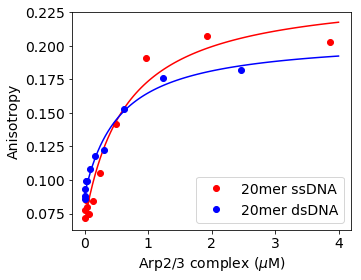

In [7]:
figure_handle, axes_handle = subplots()
figure_handle.set_figwidth(5)
fit_arp23_concentration_row = linspace(0, 4, 100)
axes_handle.plot(ssdna_arp23_concentration_row, ssdna_anisotropy_row, 'ro', label = '20mer ssDNA')
axes_handle.plot(fit_arp23_concentration_row, dna_anisotropy(fit_arp23_concentration_row, *ssdna_fit_opt), 'r')
axes_handle.plot(dsdna_arp23_concentration_row, dsdna_anisotropy_row, 'bo', label = '20mer dsDNA')
axes_handle.plot(fit_arp23_concentration_row, dna_anisotropy(fit_arp23_concentration_row, *dsdna_fit_opt), 'b')
axes_handle.set_ylabel(r'Anisotropy', fontsize = 14)
axes_handle.set_xlabel(r'Arp2/3 complex ($\mu$M)', fontsize = 14)
axes_handle.legend(fontsize = 14)
axes_handle.tick_params(labelsize = 14)

In [10]:
from numpy import diag
print(dsdna_fit_opt)
print(sqrt(diag(dsdna_fit_cov)))

[0.55182018 0.09024719 0.20653237]
[0.13415598 0.00252893 0.00945568]
